In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import UnivariateSpline
import numpy as np

import sys
sys.path.append("../")

In [3]:
all_tires = {
    "cornering_Hoosier_16x6.0-10_R20_6":{"long":None, "lat":None},
    # "cornering_Hoosier_18x6.0-10_R20_6":{"long":None, "lat":None},
    # "braking_Hoosier_18x6.0-10_R20_6":{"long":None, "lat":None},
    # "cornering_Hoosier_16x6.0-10_LCO_6":{"long":None, "lat":None},
    # "cornering_Hoosier_18x6.0-10_LCO_6":{"long":None, "lat":None},
    # "braking_Hoosier_18x6.0-10_LCO_6":{"long":None, "lat":None},
    "cornering_Hoosier_16x6.0-10_R20_7":{"long":None, "lat":None},
    "cornering_Hoosier_16x7.5-10_R20_7":{"long":None, "lat":None},
    # "cornering_Hoosier_18x6.0-10_R20_7":{"long":None, "lat":None},
    # "braking_Hoosier_18x6.0-10_R20_7":{"long":None, "lat":None},
    # "cornering_Hoosier_16x6.0-10_LCO_7":{"long":None, "lat":None},
    # "cornering_Hoosier_16x7.5-10_LCO_7":{"long":None, "lat":None},
    # "cornering_Hoosier_18x6.0-10_LCO_7":{"long":None, "lat":None},
    # "braking_Hoosier_18x6.0-10_LCO_7":{"long":None, "lat":None},
    "cornering_Hoosier_16x7.5-10_R20_8":{"long":None, "lat":None},
    # "cornering_Hoosier_16x7.5-10_LCO_8":{"long":None, "lat":None}
}

tires_LCO_vs_R20 = {
    "cornering_Hoosier_16x7.5-10_LCO_7":{"long":None, "lat":None},
    "cornering_Hoosier_16x7.5-10_R20_7":{"long":None, "lat":None}
}

tires_6_R20 = {
    "cornering_Hoosier_16x6.0-10_R20_6":{"long":None, "lat":None},
    "cornering_Hoosier_18x6.0-10_R20_6":{"long":None, "lat":None},
    "braking_Hoosier_18x6.0-10_R20_6":{"long":None, "lat":None}
    }

tires_6_LCO = {
    # "cornering_Hoosier_16x6.0-10_LCO_6":{"long":None, "lat":None},
    # "cornering_Hoosier_18x6.0-10_LCO_6":{"long":None, "lat":None},
    "braking_Hoosier_18x6.0-10_LCO_6":{"long":None, "lat":None}
    }

tires_7_R20 = {
    # "cornering_Hoosier_16x6.0-10_R20_7":{"long":None, "lat":None},
    "cornering_Hoosier_16x7.5-10_R20_7":{"long":None, "lat":None},
    "cornering_Hoosier_16x7.5-10_R20_7":{"long":None, "lat":None}
    # "cornering_Hoosier_18x6.0-10_R20_7":{"long":None, "lat":None}
    # "braking_Hoosier_18x6.0-10_R20_7":{"long":None, "lat":None}
    }

tires_7_LCO = {
    "cornering_Hoosier_16x6.0-10_LCO_7":{"long":None, "lat":None},
    "cornering_Hoosier_16x7.5-10_LCO_7":{"long":None, "lat":None},
    "cornering_Hoosier_18x6.0-10_LCO_7":{"long":None, "lat":None}
    # "braking_Hoosier_18x6.0-10_LCO_7":{"long":None, "lat":None}
    }

tires_8_R20 = {
    "cornering_Hoosier_16x7.5-10_R20_8":{"long":None, "lat":None}
    }

tires_8_LCO = {
    "cornering_Hoosier_16x7.5-10_LCO_8":{"long":None, "lat":None}
    }

camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
slip_ratio = 0

In [20]:
tire_dict = all_tires.items()
# tire_dict = tires_7_R20.items()
# tire_dict = tires_7_LCO.items()
# tire_dict = tires_LCO_vs_R20.items()

# tires = {
#     "cornering_Hoosier_16x7.5-10_R20_7":{"long":None, "lat":None}
# }

# tire_dict = tires.items()

for name, tire in tire_dict:
    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity) & (df["camber"] == camber) & (df["slip"] == slip_angle)]
        # tire["long"] = df[(df["velocity"] == velocity) & (df["camber"] == camber) & (df["slip"] == slip_angle)]
        
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["lat"] = df[((df["velocity"] == velocity) & (df["pressure"] == pressure) & (df["camber"] == camber))]
        
    except:
        print("Error getting lateral data for {0}".format(name))

Error getting long data for cornering_Hoosier_16x6.0-10_R20_6
Error getting long data for cornering_Hoosier_16x6.0-10_R20_7
Error getting long data for cornering_Hoosier_16x7.5-10_R20_7
Error getting long data for cornering_Hoosier_16x7.5-10_R20_8


In [21]:
tire_lst = []

normal_loads = []

for name, tire in tire_dict.items():
    for normal_load in tire["lat"]["load"].tolist():
        if normal_load in normal_loads:
            pass
        else:
            normal_loads.append(normal_load)

print(normal_loads)

for item in normal_loads:
    plt.figure()
    for name, tire in tires_7_R20.items():
        temp = tire["lat"][tire["lat"]["load"] == item]

        # x_lst = temp["SA"].tolist()
        # y_lst = temp["FY"].tolist()

        # points = list(zip(x_lst, y_lst))
        # sorted_points = sorted(points , key=lambda k: [k[0], k[1]])

        # unique_points = [sorted_points[0]]
        # for point in sorted_points[1:]:
        #     if point[0] == unique_points[-1][0]:
        #         pass
        #     else:
        #         unique_points.append(point)
        
        # x_lst = [x[0] for x in unique_points]
        # y_lst = [y[1] for y in unique_points]

        # cs = UnivariateSpline(x_lst, y_lst, s = 1.5e6)
        # x_range = np.arange(min(x_lst), max(x_lst), 0.1)
        # plt.plot(x_range, cs(x_range))

        # plt.plot(x_lst, y_lst)
        
        plt.plot(temp["SA"], temp["FY"])
        tire_lst.append(name)

        plt.title(f"FY vs SA at {round(item) * -1} N Normal Load")
        plt.xlabel("SA (deg)")
        plt.ylabel("FY (N)")

    plt.legend(tire_lst)

AttributeError: 'dict_items' object has no attribute 'items'

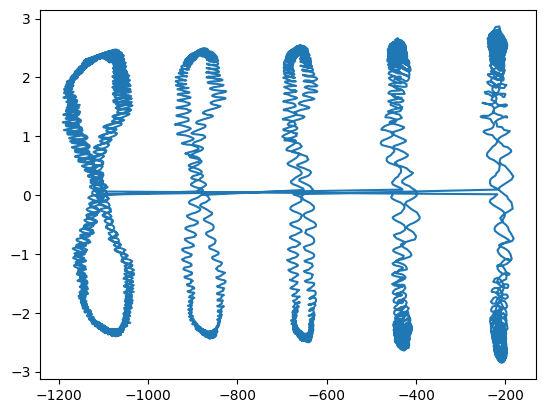

In [18]:
for name, tire in tire_dict:
    temp = tire["lat"]

    plt.plot(temp["FZ"], temp["FY"] / temp["FZ"])
    break

Text(0, 0.5, 'Linear Spring Stiffness (lbf / in)')

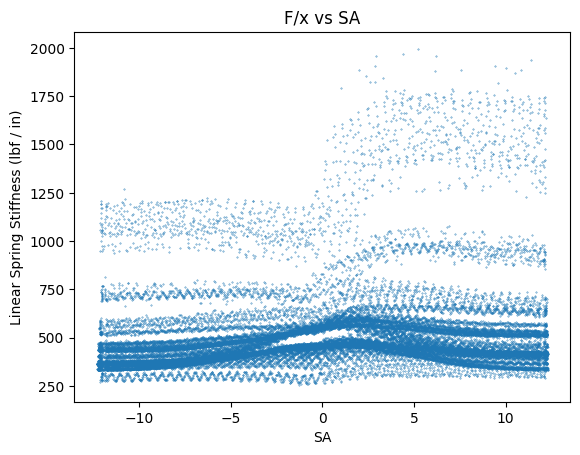

In [6]:
displacement = []
normal_force = []
slip_angle = []

for name, tire in tire_dict:
    temp = tire["lat"]

    displacement += list((20.32 - temp["RL"]) * 0.01)
    normal_force += list(temp["FZ"] * -1)
    slip_angle += list(temp["SA"])

stiffnesses = []

for i in range(len(normal_force)):
    stiffnesses.append(normal_force[i] / displacement[i])

plt.figure()
plt.scatter(slip_angle, [x * 0.00571015 for x in stiffnesses], s = 0.1)
# plt.scatter(displacement, normal_force, s = 0.1)

# plt.plot(normal_load_plotting, tire_stiffnesses)
plt.title(f"F/x vs SA")
plt.xlabel("SA")
plt.ylabel("Linear Spring Stiffness (lbf / in)")

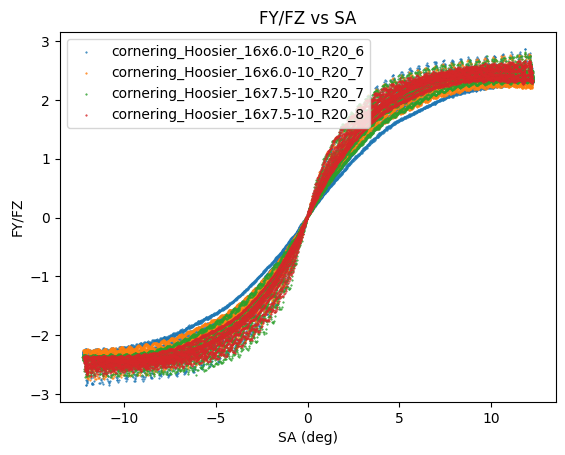

In [7]:
tire_lst = []

normal_loads = []

for name, tire in tire_dict:
    for normal_load in tire["lat"]["load"].tolist():
        if normal_load in normal_loads:
            pass
        else:
            normal_loads.append(normal_load)

# print(normal_loads)

# for item in normal_loads:
plt.figure()
for name, tire in tire_dict:
    # print(name)
    # temp = tire["lat"][tire["lat"]["load"] == item]
    temp = tire["lat"]

    x_lst = temp["SA"].tolist()
    y_lst = (temp["FY"] / temp["FZ"]).tolist()

    # points = list(zip(x_lst, y_lst))
    # sorted_points = sorted(points , key=lambda k: [k[0], k[1]])

    # unique_points = [sorted_points[0]]
    # for point in sorted_points[1:]:
    #     if point[0] == unique_points[-1][0]:
    #         pass
    #     else:
    #         unique_points.append(point)
    
    # points_per = 20
    # remove_oscillation = [(unique_points[i][0], sum([x[1] for x in unique_points[i:i+points_per]]) / len(unique_points[i:i+points_per])) for i in range(0, len(unique_points), points_per)]
    
    # x_lst = [x[0] for x in remove_oscillation]
    # y_lst = [y[1] for y in remove_oscillation]

    # cs = UnivariateSpline(x_lst, y_lst, s = 2e6)
    # x_range = np.arange(min(x_lst), max(x_lst), 0.1)
    # plt.plot(x_range, cs(x_range))
    plt.scatter(x_lst, y_lst, s = 0.25)

    # plt.scatter(x_lst, y_lst, s = 0.1)
    
    # plt.plot(temp["SA"], temp["FY"])
    tire_lst.append(name)

    plt.title(f"FY/FZ vs SA")
    plt.xlabel("SA (deg)")
    plt.ylabel("FY/FZ")
    # plt.xlim(-10, 10)

plt.legend(tire_lst)
# plt.legend(
#     ["16x6.0-10_R20_6", 
#      "18x6.0-10_R20_6",
#      "16x6.0-10_LCO_6",
#      "18x6.0-10_LCO_6",
#      "16x6.0-10_R20_7",
#      "18x6.0-10_R20_7",
#      "16x6.0-10_LCO_7",
#      "16x7.5-10_LCO_7",
#      "18x6.0-10_LCO_7",
#      "16x7.5-10_R20_8",
#      "16x7.5-10_LCO_8"])

In [5]:
for name, tire in tires_7_LCO.items():
    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity) & (df["camber"] == camber) & (df["slip"] == slip_angle)]
        
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["lat"] = df[((df["velocity"] == velocity) & (df["pressure"] == pressure) & (df["camber"] == camber))]

    except:
        print("Error getting lateral data for {0}".format(name))

for name, tire in tires_7_R20.items():
    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity) & (df["camber"] == camber)]
    
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["lat"] = df[((df["velocity"] == velocity) & (df["pressure"] == pressure) & (df["camber"] == camber))]

    except:
        print("Error getting lateral data for {0}".format(name))

[-1112.0551223483046, -889.6440978786436, -667.2330734089827, -222.4110244696609, -444.8220489393218]


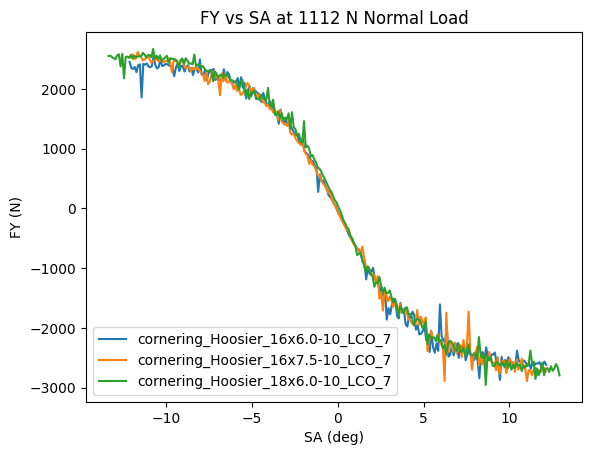

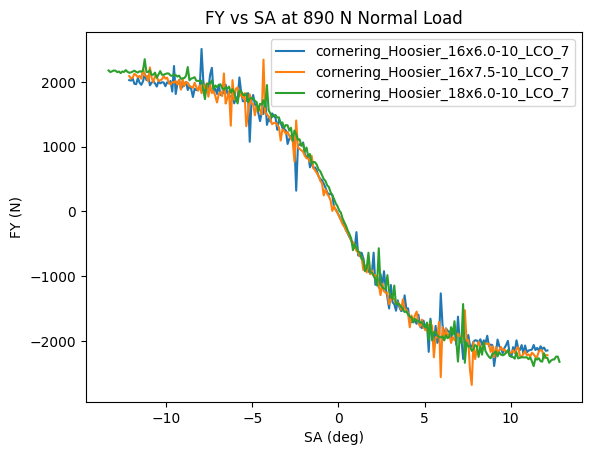

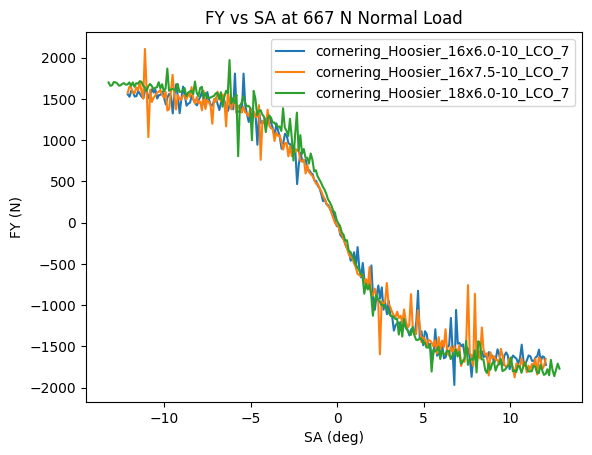

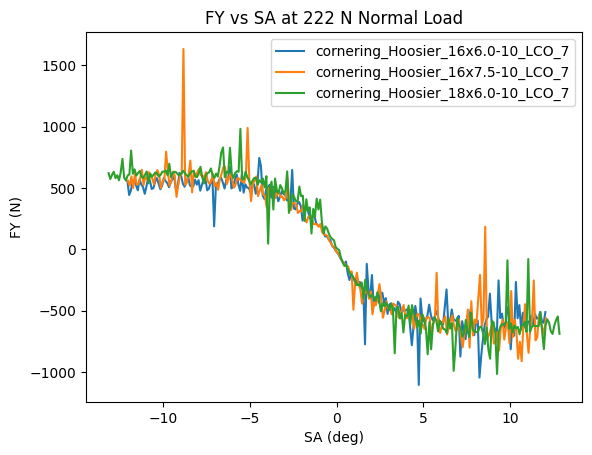

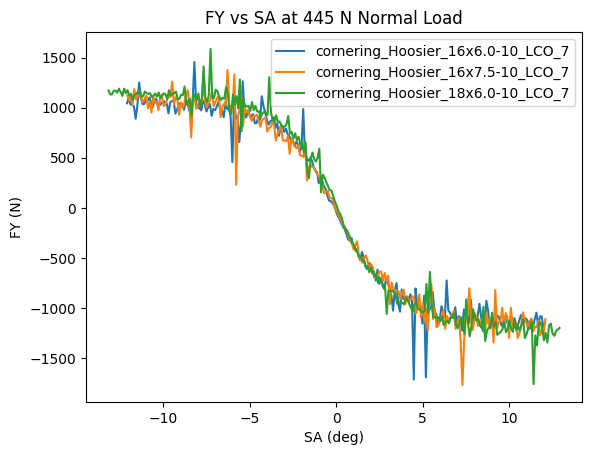

In [6]:
tire_lst = []

normal_loads = []

for name, tire in tires_7_LCO.items():
    for normal_load in tire["lat"]["load"].tolist():
        if normal_load in normal_loads:
            pass
        else:
            normal_loads.append(normal_load)

print(normal_loads)

for item in normal_loads:
    plt.figure()
    for name, tire in tires_7_LCO.items():
        temp = tire["lat"][tire["lat"]["load"] == item]

        x_lst = temp["SA"].tolist()
        y_lst = temp["FY"].tolist()

        points = list(zip(x_lst, y_lst))
        sorted_points = sorted(points , key=lambda k: [k[0], k[1]])

        unique_points = [sorted_points[0]]
        for point in sorted_points[1:]:
            if point[0] == unique_points[-1][0]:
                pass
            else:
                unique_points.append(point)
        
        x_lst = [x[0] for x in unique_points]
        y_lst = [y[1] for y in unique_points]

        cs = UnivariateSpline(x_lst, y_lst, s = 0)
        x_range = np.arange(min(x_lst), max(x_lst), 0.1)
        plt.plot(x_range, cs(x_range))

        # plt.scatter(x_lst, y_lst, s = 0.1)
        
        # plt.plot(temp["SA"], temp["FY"])
        tire_lst.append(name)

        plt.title(f"FY vs SA at {round(item) * -1} N Normal Load")
        plt.xlabel("SA (deg)")
        plt.ylabel("FY (N)")

    plt.legend(tire_lst)

[-1112.0551223483046, -889.6440978786436, -667.2330734089827, -222.4110244696609, -444.8220489393218]


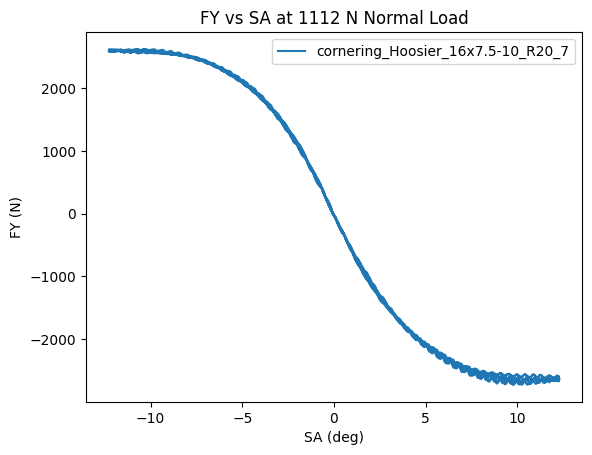

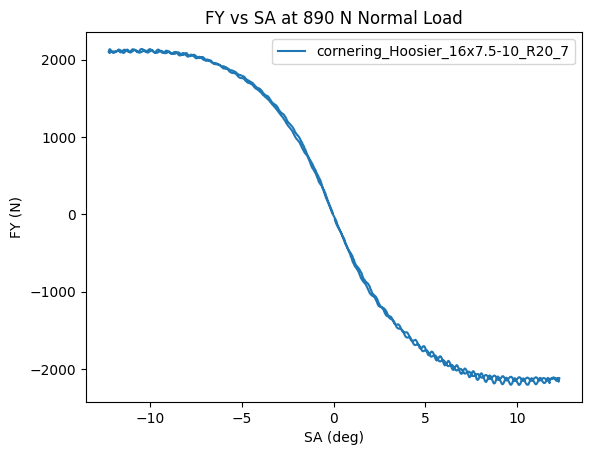

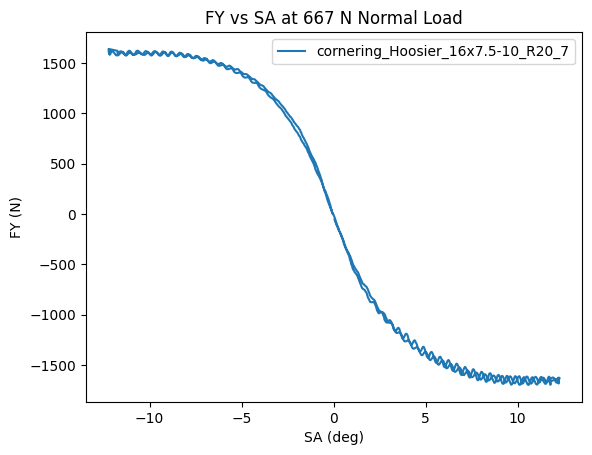

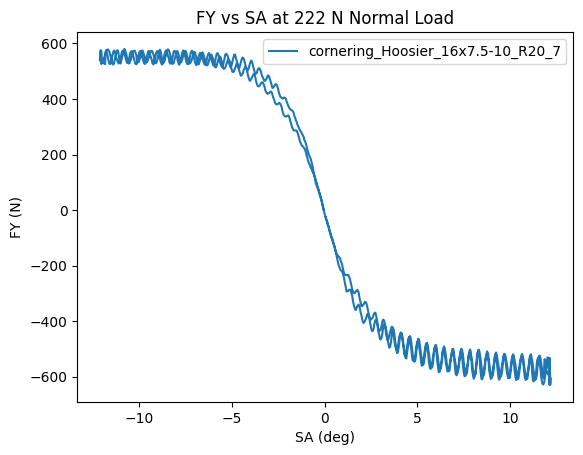

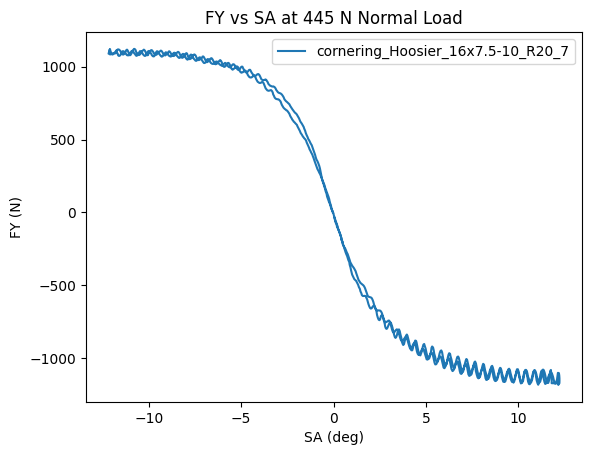

In [7]:
tire_lst = []

normal_loads = []

for name, tire in tires_7_R20.items():
    for normal_load in tire["lat"]["load"].tolist():
        if normal_load in normal_loads:
            pass
        else:
            normal_loads.append(normal_load)

print(normal_loads)

for item in normal_loads:
    plt.figure()
    for name, tire in tires_7_R20.items():
        temp = tire["lat"][tire["lat"]["load"] == item]

        # x_lst = temp["SA"].tolist()
        # y_lst = temp["FY"].tolist()

        # points = list(zip(x_lst, y_lst))
        # sorted_points = sorted(points , key=lambda k: [k[0], k[1]])

        # unique_points = [sorted_points[0]]
        # for point in sorted_points[1:]:
        #     if point[0] == unique_points[-1][0]:
        #         pass
        #     else:
        #         unique_points.append(point)
        
        # x_lst = [x[0] for x in unique_points]
        # y_lst = [y[1] for y in unique_points]

        # cs = UnivariateSpline(x_lst, y_lst, s = 1.5e6)
        # x_range = np.arange(min(x_lst), max(x_lst), 0.1)
        # plt.plot(x_range, cs(x_range))

        # plt.plot(x_lst, y_lst)
        
        plt.plot(temp["SA"], temp["FY"])
        tire_lst.append(name)

        plt.title(f"FY vs SA at {round(item) * -1} N Normal Load")
        plt.xlabel("SA (deg)")
        plt.ylabel("FY (N)")

    plt.legend(tire_lst)

[-1112.0551223483046, -889.6440978786436, -667.2330734089827, -222.4110244696609, -444.8220489393218]
cornering_Hoosier_16x6.0-10_LCO_7
cornering_Hoosier_16x7.5-10_LCO_7
cornering_Hoosier_18x6.0-10_LCO_7


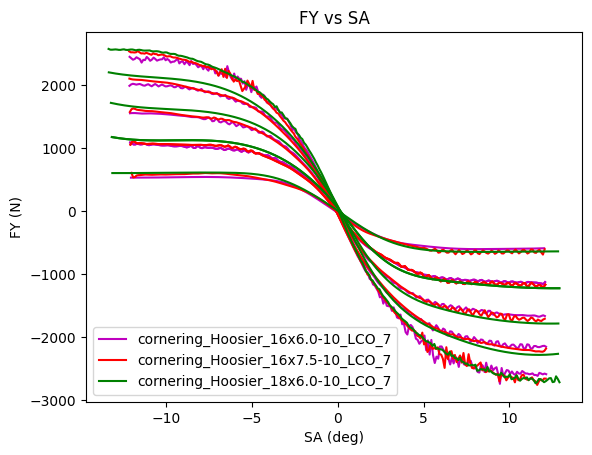

In [8]:
normal_loads = []

for name, tire in tires_7_LCO.items():
    for normal_load in tire["lat"]["load"].tolist():
        if normal_load in normal_loads:
            pass
        else:
            normal_loads.append(normal_load)

print(normal_loads)

tire_lst = []

lines = []

plt.figure()
colors = ['m', 'r', 'g']
i = -1
for name, tire in list(tires_7_LCO.items()):
    print(name)
    i += 1
    for item in normal_loads:
        temp = tire["lat"][tire["lat"]["load"] == item]

        x_lst = temp["SA"].tolist()
        y_lst = temp["FY"].tolist()

        points = list(zip(x_lst, y_lst))
        sorted_points = sorted(points , key=lambda k: [k[0], k[1]])

        unique_points = [sorted_points[0]]
        for point in sorted_points[1:]:
            if point[0] == unique_points[-1][0]:
                pass
            else:
                unique_points.append(point)
        
        x_lst = [x[0] for x in unique_points]
        y_lst = [y[1] for y in unique_points]

        cs = UnivariateSpline(x_lst, y_lst, s = 2e6)
        x_range = np.arange(min(x_lst), max(x_lst), 0.1)
        plt.plot(x_range, cs(x_range), color = colors[i])

    line, = plt.plot(x_range, cs(x_range), color = colors[i])
    lines.append(line,)
    tire_lst.append(name)

    plt.title(f"FY vs SA")
    plt.xlabel("SA (deg)")
    plt.ylabel("FY (N)")

    plt.legend(lines, tire_lst)